## Exploratory analysis on the result of dge_MAST function

- dge_MAST function returns a list of genes with p-values, z-scores, etc.

In this notebook, we will grab the result of the dge_MAST function on XAUT1-Blood object (for each pair of conditions), then do the downstream analyses.

For this, we can refer to the analyses and visualization methods used in CTA paper.


In [1]:
import pandas as pd
import scanpy as sc
import anndata as ad
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams.update(mpl.rcParamsDefault) #Reset rcParams to default
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']  # Colors in this style

# Plotting style function (run this before plotting the final figure)
def set_plotting_style():
    plt.style.use('seaborn-paper')
    plt.rc('axes', labelsize=12)
    plt.rc('axes', titlesize=12)
    plt.rc('xtick', labelsize=10)
    plt.rc('ytick', labelsize=10)
    plt.rc('legend', fontsize=10)
    plt.rc('text.latex', preamble=r'\usepackage{sfmath}')
    plt.rc('xtick.major', pad=2)
    plt.rc('ytick.major', pad=2)
    plt.rc('mathtext', fontset='stixsans', sf='sansserif')
    plt.rc('figure', figsize=[10,9])
    plt.rc('svg', fonttype='none')

In [72]:
# adata = sc.read_h5ad('/mnt/ibm_lg/yangjoon.kim/UC_UCSF_Multiome/MAST/XAUT1_blood_RNA_220613.h5ad')
# adata

AnnData object with n_obs × n_vars = 20130 × 22741
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'NUM.SNPS', 'NUM.READS', 'DROPLET.TYPE', 'BEST.GUESS', 'percent.mt', 'percent.ribo', 'S.Score', 'G2M.Score', 'Phase', 'SAMPLE.by.SNPs', 'nCount_SCT', 'nFeature_SCT', 'DF.DROPLET.TYPE', 'LIBRARY', 'RNA_snn_res.0.2', 'seurat_clusters', 'louvain_res0.2', 'RNA_snn_res.0.4', 'louvain_res0.4', 'RNA_snn_res.0.6', 'louvain_res0.6', 'RNA_snn_res.0.8', 'louvain_res0.8', 'RNA_snn_res.1', 'louvain_res1', 'RNA_snn_res.1.2', 'louvain_res1.2', 'RNA_snn_res.1.4', 'louvain_res1.4', 'RNA_snn_res.1.6', 'louvain_res1.6', 'RNA_snn_res.1.8', 'louvain_res1.8', 'RNA_snn_res.2', 'louvain_res2', 'CoLabs_ID', 'CoLabs_patient', 'condition', 'coarse_annotations', 'fine_annotations', 'MK final coarse_V2', 'MK final fine annotations_V2', 'MK final coarse_V2 a4B7', 'MK final fine annotations_V2 a4B7', 'coarse', 'fine'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.va

In [2]:
df_XAUT1_Blood_fine = pd.read_csv('/mnt/ibm_lg/yangjoon.kim/UC_UCSF_Multiome/MAST/result/XAUT1_Blood_condition_all_celltypes_DGE_fine_MAST.csv')
df_XAUT1_Blood_fine

,gene,pval,log2fc,cell_type,tissue,method,covariate
0,ALOX5AP,0.000348,-4.526211,07_gd T,XAUT1_Blood_HC_UCNB,MAST,ngenes
1,GZMH,0.028953,2.575342,07_gd T,XAUT1_Blood_HC_UCNB,MAST,ngenes
2,HLA-B,0.001790,-0.927382,07_gd T,XAUT1_Blood_HC_UCNB,MAST,ngenes
3,IL7R,0.000004,-5.616784,07_gd T,XAUT1_Blood_HC_UCNB,MAST,ngenes
4,KLRC1,0.000296,-4.828989,07_gd T,XAUT1_Blood_HC_UCNB,MAST,ngenes
...,...,...,...,...,...,...,...
1149,CTSW,0.013054,-2.841090,05_MAIT,XAUT1_Blood_UCV_UCNB,MAST,ngenes
1150,IFITM3,0.000006,3.526953,05_MAIT,XAUT1_Blood_UCV_UCNB,MAST,ngenes
1151,MTND1P23,0.000026,2.040210,05_MAIT,XAUT1_Blood_UCV_UCNB,MAST,ngenes
1152,RPS2P5,0.013054,2.924478,05_MAIT,XAUT1_Blood_UCV_UCNB,MAST,ngenes


In [3]:
array_cell_types = df_XAUT1_Blood_fine['cell_type'].unique()
array_cell_types

array(['07_gd T', '03C_CD4_NAIVE', '03A_CD4_TCM and NOS',
       '09_CD14 classical monocytes', '08_NK', '01B_B_memory', '05_MAIT',
       '10_CD16 Nonclassical monocytes', '06A_CD8 TEM', '01C_B_NOS',
       '06B_CD8 TCM', '01A_B_naive', '03B_CD4 TEM and CTL', '11_DC',
       '04_Treg', '13_Platelets', '14_Erythrocytes'], dtype=object)

In [4]:
df_XAUT1_Blood_fine.head()

,gene,pval,log2fc,cell_type,tissue,method,covariate
0,ALOX5AP,0.000348,-4.526211,07_gd T,XAUT1_Blood_HC_UCNB,MAST,ngenes
1,GZMH,0.028953,2.575342,07_gd T,XAUT1_Blood_HC_UCNB,MAST,ngenes
2,HLA-B,0.001790,-0.927382,07_gd T,XAUT1_Blood_HC_UCNB,MAST,ngenes
3,IL7R,0.000004,-5.616784,07_gd T,XAUT1_Blood_HC_UCNB,MAST,ngenes
4,KLRC1,0.000296,-4.828989,07_gd T,XAUT1_Blood_HC_UCNB,MAST,ngenes


## Analysis by cell type class

For each pair of conditions, check which cell-types have more differentially expressed genes.

### (1) HC vs UCNB

In [5]:
# First, let's subset the anndata for pairs of conditions
# HC vs UCNB
df_XAUT1_Blood_fine_HC_UCNB = df_XAUT1_Blood_fine[df_XAUT1_Blood_fine["tissue"]=="XAUT1_Blood_HC_UCNB"]
df_XAUT1_Blood_fine_HC_UCNB

,gene,pval,log2fc,cell_type,tissue,method,covariate
0,ALOX5AP,3.476082e-04,-4.526211,07_gd T,XAUT1_Blood_HC_UCNB,MAST,ngenes
1,GZMH,2.895342e-02,2.575342,07_gd T,XAUT1_Blood_HC_UCNB,MAST,ngenes
2,HLA-B,1.789621e-03,-0.927382,07_gd T,XAUT1_Blood_HC_UCNB,MAST,ngenes
3,IL7R,3.549960e-06,-5.616784,07_gd T,XAUT1_Blood_HC_UCNB,MAST,ngenes
4,KLRC1,2.956925e-04,-4.828989,07_gd T,XAUT1_Blood_HC_UCNB,MAST,ngenes
...,...,...,...,...,...,...,...
316,RBMS1,2.858793e-02,-1.160466,03B_CD4 TEM and CTL,XAUT1_Blood_HC_UCNB,MAST,ngenes
317,RPS26,1.619625e-15,1.253279,03B_CD4 TEM and CTL,XAUT1_Blood_HC_UCNB,MAST,ngenes
318,TNFSF13B,3.115240e-03,-1.153598,03B_CD4 TEM and CTL,XAUT1_Blood_HC_UCNB,MAST,ngenes
319,TTC39C-AS1,1.107479e-02,-1.242103,03B_CD4 TEM and CTL,XAUT1_Blood_HC_UCNB,MAST,ngenes


In [6]:
num_DEG_per_cell_type = []
# define the list of cell-types
list_cell_types = df_XAUT1_Blood_fine_HC_UCNB["cell_type"].unique()
num_cell_types = len(list_cell_types)

for i in range(0,num_cell_types):
    cell_type = list_cell_types[i]
    df_subset = df_XAUT1_Blood_fine_HC_UCNB[df_XAUT1_Blood_fine_HC_UCNB["cell_type"]==cell_type]
    #df_subset = df_subset[abs(df_subset["log2fc"])>2]
    num_DEG = len(df_subset)
    num_DEG_per_cell_type.append(num_DEG)


<AxesSubplot:>

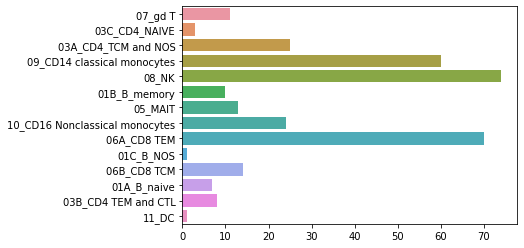

In [7]:
num_DEG_per_cell_type

sns.barplot(y=list_cell_types, x=num_DEG_per_cell_type)

### (2) HC vs UCV

In [13]:
# HC vs UCV
df_XAUT1_Blood_fine_HC_UCV = df_XAUT1_Blood_fine[df_XAUT1_Blood_fine["tissue"]=="XAUT1_Blood_HC_UCV"]
df_XAUT1_Blood_fine_HC_UCV

,gene,pval,log2fc,cell_type,tissue,method,covariate
321,FOS,2.491134e-02,3.061046,07_gd T,XAUT1_Blood_HC_UCV,MAST,ngenes
322,HLA-B,1.706125e-09,-1.238576,07_gd T,XAUT1_Blood_HC_UCV,MAST,ngenes
323,IFITM3,1.941915e-14,5.956415,07_gd T,XAUT1_Blood_HC_UCV,MAST,ngenes
324,SMDT1,3.369703e-03,-3.063024,07_gd T,XAUT1_Blood_HC_UCV,MAST,ngenes
325,IFITM3,7.037017e-03,2.581890,03C_CD4_NAIVE,XAUT1_Blood_HC_UCV,MAST,ngenes
...,...,...,...,...,...,...,...
766,CDKN1A,2.385824e-03,3.094349,13_Platelets,XAUT1_Blood_HC_UCV,MAST,ngenes
767,RPL14,4.772840e-02,-4.213917,13_Platelets,XAUT1_Blood_HC_UCV,MAST,ngenes
768,RPL3,1.092173e-02,-4.674728,13_Platelets,XAUT1_Blood_HC_UCV,MAST,ngenes
769,RPL34,3.535136e-03,-4.176022,13_Platelets,XAUT1_Blood_HC_UCV,MAST,ngenes


<AxesSubplot:>

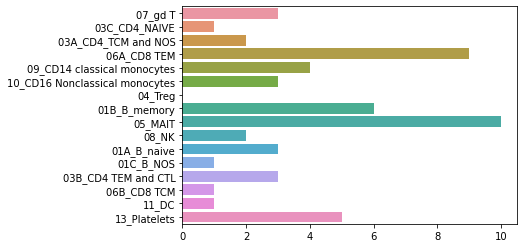

In [14]:
num_DEG_per_cell_type = []
# define the list of cell-types
list_cell_types = df_XAUT1_Blood_fine_HC_UCV["cell_type"].unique()
num_cell_types = len(list_cell_types)

for i in range(0,num_cell_types):
    cell_type = list_cell_types[i]
    df_subset = df_XAUT1_Blood_fine_HC_UCV[df_XAUT1_Blood_fine_HC_UCV["cell_type"]==cell_type]
    df_subset = df_subset[abs(df_subset["log2fc"])>2]
    num_DEG = len(df_subset)
    num_DEG_per_cell_type.append(num_DEG)

num_DEG_per_cell_type

sns.barplot(y=list_cell_types, x=num_DEG_per_cell_type)

### (3) UCNB vs UCV

In [16]:
# UCNB vs UCV
df_XAUT1_Blood_fine_UCV_UCNB = df_XAUT1_Blood_fine[df_XAUT1_Blood_fine["tissue"]=="XAUT1_Blood_UCV_UCNB"]
df_XAUT1_Blood_fine_UCV_UCNB

,gene,pval,log2fc,cell_type,tissue,method,covariate
771,AC006369.2,0.000020,-0.833422,06A_CD8 TEM,XAUT1_Blood_UCV_UCNB,MAST,ngenes
772,ACTG1,0.000005,0.799174,06A_CD8 TEM,XAUT1_Blood_UCV_UCNB,MAST,ngenes
773,ACTR3,0.007082,0.872894,06A_CD8 TEM,XAUT1_Blood_UCV_UCNB,MAST,ngenes
774,ADAM8,0.014438,0.633866,06A_CD8 TEM,XAUT1_Blood_UCV_UCNB,MAST,ngenes
775,ADGRG1,0.000010,1.209956,06A_CD8 TEM,XAUT1_Blood_UCV_UCNB,MAST,ngenes
...,...,...,...,...,...,...,...
1149,CTSW,0.013054,-2.841090,05_MAIT,XAUT1_Blood_UCV_UCNB,MAST,ngenes
1150,IFITM3,0.000006,3.526953,05_MAIT,XAUT1_Blood_UCV_UCNB,MAST,ngenes
1151,MTND1P23,0.000026,2.040210,05_MAIT,XAUT1_Blood_UCV_UCNB,MAST,ngenes
1152,RPS2P5,0.013054,2.924478,05_MAIT,XAUT1_Blood_UCV_UCNB,MAST,ngenes


In [17]:
df_XAUT1_Blood_fine_UCV_UCNB.sort_values('log2fc')

,gene,pval,log2fc,cell_type,tissue,method,covariate
1013,TRBC2,1.428349e-02,-4.505869,07_gd T,XAUT1_Blood_UCV_UCNB,MAST,ngenes
1065,MYOM2,5.979796e-80,-3.876997,08_NK,XAUT1_Blood_UCV_UCNB,MAST,ngenes
1014,TRDV1,8.976221e-04,-3.730518,07_gd T,XAUT1_Blood_UCV_UCNB,MAST,ngenes
1131,RPS26,3.739581e-03,-3.207158,01C_B_NOS,XAUT1_Blood_UCV_UCNB,MAST,ngenes
1122,RPS26,2.477573e-04,-3.132864,14_Erythrocytes,XAUT1_Blood_UCV_UCNB,MAST,ngenes
...,...,...,...,...,...,...,...
877,RPS4Y1,3.931208e-52,3.698338,06A_CD8 TEM,XAUT1_Blood_UCV_UCNB,MAST,ngenes
1012,KLRC1,1.775979e-02,3.856565,07_gd T,XAUT1_Blood_UCV_UCNB,MAST,ngenes
1126,RPS4Y1,1.319871e-11,3.994690,01A_B_naive,XAUT1_Blood_UCV_UCNB,MAST,ngenes
1139,RPS4Y1,4.099669e-08,4.103991,01B_B_memory,XAUT1_Blood_UCV_UCNB,MAST,ngenes


In [18]:
df_XAUT1_Blood_fine_UCV_UCNB[abs(df_XAUT1_Blood_fine_UCV_UCNB["log2fc"])>2]

,gene,pval,log2fc,cell_type,tissue,method,covariate
808,DUSP2,5.320362e-18,-2.068433,06A_CD8 TEM,XAUT1_Blood_UCV_UCNB,MAST,ngenes
811,FGFBP2,2.078347e-17,2.218638,06A_CD8 TEM,XAUT1_Blood_UCV_UCNB,MAST,ngenes
813,FOS,4.719040e-15,-2.092645,06A_CD8 TEM,XAUT1_Blood_UCV_UCNB,MAST,ngenes
817,GNLY,1.993011e-23,2.645954,06A_CD8 TEM,XAUT1_Blood_UCV_UCNB,MAST,ngenes
819,GZMB,1.745862e-14,2.030689,06A_CD8 TEM,XAUT1_Blood_UCV_UCNB,MAST,ngenes
821,GZMK,2.078347e-17,-2.217709,06A_CD8 TEM,XAUT1_Blood_UCV_UCNB,MAST,ngenes
838,ITGB1,6.487460e-15,2.019778,06A_CD8 TEM,XAUT1_Blood_UCV_UCNB,MAST,ngenes
851,MT-ATP8,3.180398e-21,-2.058605,06A_CD8 TEM,XAUT1_Blood_UCV_UCNB,MAST,ngenes
853,MT2A,5.590155e-16,2.141374,06A_CD8 TEM,XAUT1_Blood_UCV_UCNB,MAST,ngenes
877,RPS4Y1,3.931208e-52,3.698338,06A_CD8 TEM,XAUT1_Blood_UCV_UCNB,MAST,ngenes


<AxesSubplot:>

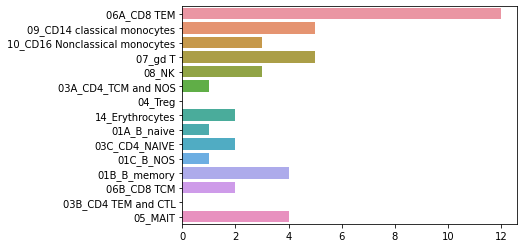

In [19]:
num_DEG_per_cell_type = []
# define the list of cell-types
list_cell_types = df_XAUT1_Blood_fine_UCV_UCNB["cell_type"].unique()
num_cell_types = len(list_cell_types)

for i in range(0,num_cell_types):
    cell_type = list_cell_types[i]
    df_subset = df_XAUT1_Blood_fine_UCV_UCNB[df_XAUT1_Blood_fine_UCV_UCNB["cell_type"]==cell_type]
    df_subset = df_subset[abs(df_subset["log2fc"])>2]
    num_DEG = len(df_subset)
    num_DEG_per_cell_type.append(num_DEG)

num_DEG_per_cell_type

sns.barplot(y=list_cell_types, x=num_DEG_per_cell_type)

## 2D visuliazation of the DGE results (Healthy-Disease vs Disease-Treatment)

## Subset for cell-types to check the DGE

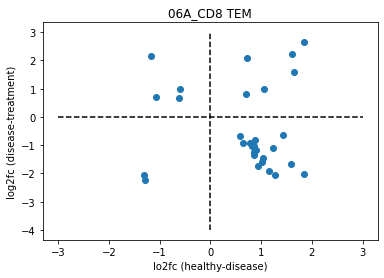

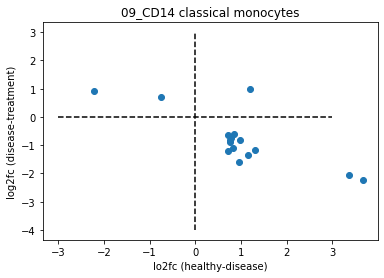

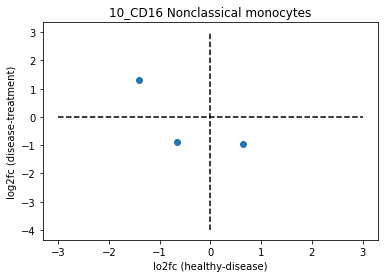

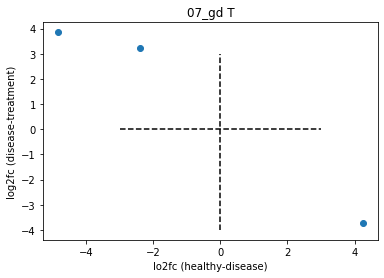

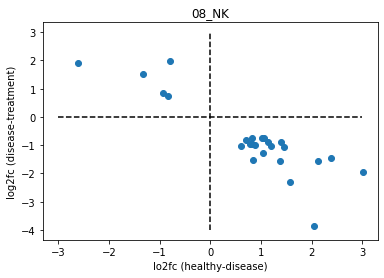

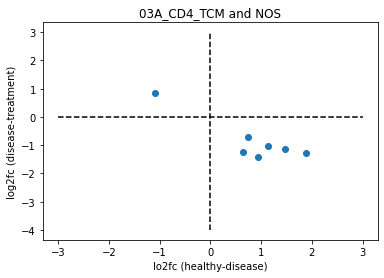

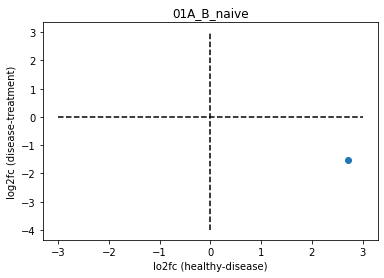

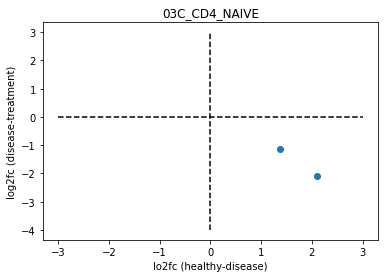

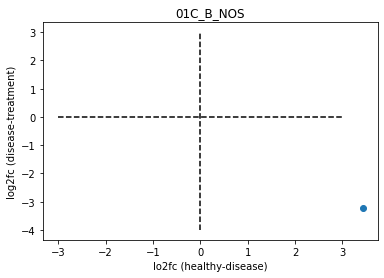

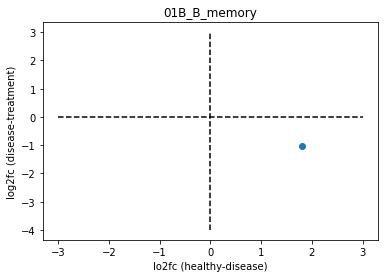

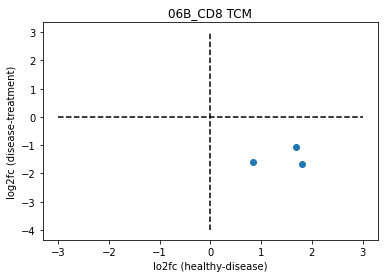

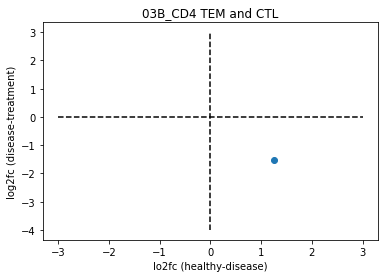

In [22]:
import math
math.nan

# define the list of cell-types
list_cell_types = df_XAUT1_Blood_fine_UCV_UCNB["cell_type"].unique()
num_cell_types = len(list_cell_types)

# initialize the dataframe to save the resulting genes with their p-values, log2fc, cell-type, etc.
df_DGE_genes_filtered = pd.DataFrame()
# joint_gene_set_master = []
index = 0 # index for the df_DGE_genes_filtered

for cell_type in list_cell_types:
    df_subset_HC_UCNB = df_XAUT1_Blood_fine_HC_UCNB[df_XAUT1_Blood_fine_HC_UCNB["cell_type"]==cell_type]
    df_subset_UCNB_UCV = df_XAUT1_Blood_fine_UCV_UCNB[df_XAUT1_Blood_fine_UCV_UCNB["cell_type"]==cell_type]

#     # filter out for abs(log2fc) > 2
#     df_subset_HC_UCNB = df_subset_HC_UCNB[abs(df_subset_HC_UCNB["log2fc"])>2]
#     df_subset_UCNB_UCV = df_subset_UCNB_UCV[abs(df_subset_UCNB_UCV["log2fc"])>2]

    list_genes_HC_UCNB = df_subset_HC_UCNB["gene"].to_list()
    list_genes_UCNB_UCV = df_subset_UCNB_UCV["gene"].to_list()
    list_genes_UCNB_UCV

    joint_gene_set = list(set(list_genes_HC_UCNB) & set(list_genes_UCNB_UCV))
    joint_gene_set
#     # Append the joint_gene_set to the master list
#     joint_gene_set_master.append(joint_gene_set)
    #gene_set_joint = set(list_genes_HC_UCNB).intersection(set(list_genes_UCNB_UCV))

    df_subset_HC_UCNB_joint_genes = df_subset_HC_UCNB[df_subset_HC_UCNB["gene"].isin(joint_gene_set)]
    df_subset_UCNB_UCV_joint_genes = df_subset_UCNB_UCV[df_subset_UCNB_UCV["gene"].isin(joint_gene_set)]

    if len(joint_gene_set)>0:
        plt.figure()
        plt.scatter(df_subset_HC_UCNB_joint_genes["log2fc"], df_subset_UCNB_UCV_joint_genes['log2fc'])
        plt.plot([-3,3], [0,0], '--k')
        plt.plot([0,0],[-4,3], '--k')
        plt.xlabel('lo2fc (healthy-disease)') # HC vs UCNB
        plt.ylabel('log2fc (disease-treatment)') # UCNB vs UCV
        plt.title(cell_type)
    
    
    for k in range(0,len(joint_gene_set)):
        gene = joint_gene_set[k]
        log2fc_value1 = df_subset_HC_UCNB_joint_genes[df_subset_HC_UCNB_joint_genes["gene"]==gene]["log2fc"].iloc[0]
        log2fc_value2 = df_subset_UCNB_UCV_joint_genes[df_subset_UCNB_UCV_joint_genes["gene"]==gene]["log2fc"].iloc[0]
        if (log2fc_value1*log2fc_value2)<0:
            df_DGE_genes_filtered.loc[index,"gene"] = gene
            df_DGE_genes_filtered.loc[index,"cell_type"] = cell_type#df_subset_HC_UCNB[df_subset_HC_UCNB["gene"]==gene]["cell_type"].iloc[0]
            df_DGE_genes_filtered.loc[index,"pval_HC_UCNB"] = df_subset_HC_UCNB[df_subset_HC_UCNB["gene"]==gene]["pval"].iloc[0]
            df_DGE_genes_filtered.loc[index,"pval_UCNB_UCV"] = df_subset_UCNB_UCV[df_subset_UCNB_UCV["gene"]==gene]["pval"].iloc[0]
            df_DGE_genes_filtered.loc[index,"log2fc_HC_UCNB"]= df_subset_HC_UCNB[df_subset_HC_UCNB["gene"]==gene]["log2fc"].iloc[0]
            df_DGE_genes_filtered.loc[index,"log2fc_UCNB_UCV"]= df_subset_UCNB_UCV[df_subset_UCNB_UCV["gene"]==gene]["log2fc"].iloc[0]
            
            if gene in df_XAUT1_Blood_fine_HC_UCV["gene"].to_list():
                df_DGE_genes_filtered.loc[index,"log2fc_HC_UCV"] = df_XAUT1_Blood_fine_HC_UCV[df_XAUT1_Blood_fine_HC_UCV["gene"]==gene]["log2fc"].iloc[0]
                df_DGE_genes_filtered.loc[index,"pval_HC_UCV"] = df_XAUT1_Blood_fine_HC_UCV[df_XAUT1_Blood_fine_HC_UCV["gene"]==gene]["pval"].iloc[0]
            else:
                df_DGE_genes_filtered.loc[index,"log2fc_HC_UCV"] = 0
                df_DGE_genes_filtered.loc[index,"pval_HC_UCV"] = math.nan
        else:
            df_DGE_genes_filtered = df_DGE_genes_filtered
                
                
        index = index+1
        



    

In [23]:
df_DGE_genes_filtered[df_DGE_genes_filtered["cell_type"]=="08_NK"]

,gene,cell_type,pval_HC_UCNB,pval_UCNB_UCV,log2fc_HC_UCNB,log2fc_UCNB_UCV,log2fc_HC_UCV,pval_HC_UCV
52,DIP2A,08_NK,1.279293e-09,2.886654e-02,1.398999,-0.875492,0.771239,3.263846e-03
53,MT-ATP8,08_NK,1.516691e-04,1.612640e-07,1.034524,-1.274350,-0.775869,4.892994e-02
54,HSPA8,08_NK,4.631997e-02,4.318535e-02,-0.841349,0.759375,0.835943,1.044708e-02
55,ACTN4,08_NK,1.594494e-02,1.583581e-02,0.706688,-0.812220,0.000000,NaN
56,TSC22D3,08_NK,2.250873e-02,2.854764e-02,-0.935093,0.834626,-0.792583,1.607677e-02
57,SH2D2A,08_NK,3.451253e-06,2.395731e-06,-1.320364,1.515217,0.000000,NaN
58,HLA-DPB1,08_NK,2.742123e-03,4.460840e-17,-0.792991,1.997596,1.388307,1.019919e-06
59,KIR2DL1,08_NK,1.126737e-13,9.538484e-08,1.196767,-1.025782,0.000000,NaN
60,PTGDS,08_NK,1.321053e-07,6.780038e-16,1.567377,-2.311748,0.000000,NaN
61,LGALS1,08_NK,3.140368e-02,1.102804e-05,0.842500,-1.521888,1.613988,1.961957e-08


In [24]:
# reorder the columns in the dataframe
df_DGE_genes_filtered = df_DGE_genes_filtered[["gene","cell_type","log2fc_HC_UCNB","log2fc_UCNB_UCV","log2fc_HC_UCV","pval_HC_UCNB","pval_UCNB_UCV","pval_HC_UCV"]]
df_DGE_genes_filtered

,gene,cell_type,log2fc_HC_UCNB,log2fc_UCNB_UCV,log2fc_HC_UCV,pval_HC_UCNB,pval_UCNB_UCV,pval_HC_UCV
0,CCL4L2,06A_CD8 TEM,1.581124,-1.661369,0.000000,7.863562e-21,6.296753e-24,NaN
2,JUNB,06A_CD8 TEM,1.043310,-1.462338,2.544876,4.146063e-04,1.488796e-11,1.143826e-04
3,JUN,06A_CD8 TEM,1.149689,-1.922353,1.887163,2.159001e-03,1.554281e-11,5.505999e-12
4,ITM2A,06A_CD8 TEM,1.010012,-1.580470,0.000000,3.626824e-05,1.607551e-14,NaN
5,RPS26,06A_CD8 TEM,1.431385,-0.626564,0.694196,6.044635e-61,2.512768e-24,1.760486e-11
...,...,...,...,...,...,...,...,...
88,RPS26,01B_B_memory,1.798798,-1.044510,0.694196,1.748412e-12,2.484429e-05,1.760486e-11
89,RPS26,06B_CD8 TCM,1.693251,-1.076963,0.694196,2.110136e-16,9.795622e-04,1.760486e-11
90,TRAV26-2,06B_CD8 TCM,1.807009,-1.666703,0.000000,8.148932e-07,4.947353e-02,NaN
91,NKG7,06B_CD8 TCM,0.832903,-1.599295,0.824376,1.287032e-02,1.523572e-02,2.588586e-10


In [25]:
df_DGE_genes_filtered.to_csv('/mnt/ibm_lg/yangjoon.kim/UC_UCSF_Multiome/MAST/result/XAUT1_Blood_fine_filtered_by_combos.csv')

In [26]:
df_DGE_genes_filtered.sort_values('log2fc_HC_UCNB')

,gene,cell_type,log2fc_HC_UCNB,log2fc_UCNB_UCV,log2fc_HC_UCV,pval_HC_UCNB,pval_UCNB_UCV,pval_HC_UCV
50,KLRC1,07_gd T,-4.828989,3.856565,0.000000,2.956925e-04,1.775979e-02,NaN
76,CD3E,08_NK,-2.616722,1.922623,0.000000,1.259576e-32,1.763721e-15,NaN
49,TRDV2,07_gd T,-2.402791,3.221263,0.000000,3.842811e-02,4.654787e-02,NaN
45,LGALS2,09_CD14 classical monocytes,-2.215732,0.930066,-1.250366,8.432000e-21,4.269017e-04,8.852128e-05
48,PLAC8,10_CD16 Nonclassical monocytes,-1.398167,1.294061,-1.386307,7.547693e-05,3.483352e-04,2.171210e-10
...,...,...,...,...,...,...,...,...
64,S100B,08_NK,3.000896,-1.942505,1.087706,2.953249e-71,1.763721e-15,9.682966e-16
35,HLA-DQB1,09_CD14 classical monocytes,3.362112,-2.071132,1.260123,2.443859e-54,3.143880e-15,1.071795e-05
87,RPS26,01C_B_NOS,3.424393,-3.207158,0.694196,4.438864e-04,3.739581e-03,1.760486e-11
31,CD52,09_CD14 classical monocytes,3.661910,-2.228155,1.197483,1.427616e-63,1.131023e-20,4.888904e-17


Text(0.5, 1.0, 'all cell-types')

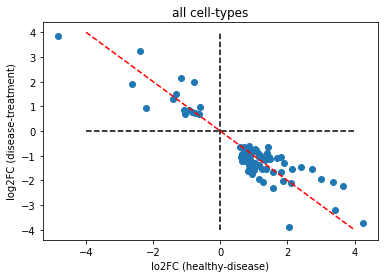

In [27]:
# 2D visualization for all cell-types (XAUT1-Blood, fine)
plt.figure()
plt.scatter(df_DGE_genes_filtered["log2fc_HC_UCNB"], df_DGE_genes_filtered['log2fc_UCNB_UCV'])
plt.plot([-4,4], [0,0], '--k')
plt.plot([0,0],[-4,4], '--k')
plt.plot([-4,4],[4,-4],'--r')
plt.xlabel('lo2FC (healthy-disease)') # HC vs UCNB
plt.ylabel('log2FC (disease-treatment)') # UCNB vs UCV
plt.title("all cell-types")